<a href="https://colab.research.google.com/github/aguscura/UBA-data-science/blob/main/tp1_n6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# N6
Uno de los mayores problemas de las reviews es que los usuarios tienen distintas escalas en puntaje para las mismas experiencias, entonces las estrellas que suele dejar un usuario no son comparables con las otro. Para normalizar un poco más esto, Yelp quiere que el usuario primero escriba el texto y según qué tan positivo o negativo sea sugerirle la cantidad de estrellas a dejar. vaderSentiment y textblob de python son dos librerías para analizar sentimientos, ambas pueden darnos un score de que tan positivo o negativo es el sentimiento de un texto. Para los textos reviews, cuál de los dos scores de emoción mejor correlaciona con el puntaje que esa review deja?

In [1]:
# !gdown "1okxCrPipVJmexBSVZ34kJlttw02-7kTX"
# !pip install vaderSentiment

In [2]:
import pandas as pd
df = pd.read_csv('/content/review.csv')
df = df.head(100000) #De nuevo problema de memoria

In [3]:
df = df[["review_id", "stars", "text"]]
df

,review_id,stars,text
0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is..."
1,Sx8TMOWLNuJBWer-0pcmoA,4.0,Cute interior and owner (?) gave us tour of up...
2,lUUhg8ltDsUZ9h0xnwY4Dg,4.0,I was really between 3 and 4 stars for this on...
3,-P5E9BYUaK7s3PwBF5oAyg,5.0,First time there and it was excellent!!! It fe...
4,YbMyvlDA2W3Py5lTz8VK-A,5.0,"Great burgers,fries and salad! Burgers have a..."
...,...,...,...
99995,5l5lOqG7wSSAYsfT4S9mrg,5.0,Great spicy food ! If u don't like spicy food ...
99996,mUhyjHQ019PxcOmhTQuH5w,4.0,Happy hour review only. Great oysters and grea...
99997,qJVmFtO3Xn_KDaMdV0WPtw,5.0,I was visiting St Louis last week all week and...
99998,NJ_iJsZ2pUzDdDl5wCWcug,4.0,"On our trip to New Orleans, our great friends ..."


**Vader sentiment**

In [4]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
vader_stars = []
compound_list = []
for i in df.index:
    
  sentiment_dict = analyzer.polarity_scores(df["text"][i])
  compound = sentiment_dict['compound']       #Métrica para definir las estrellas: compound (va de -1 a 1). Divido en 5 intervalos para asignar estrellas:

  #Sugerencia de estrellas:
  if (compound >= -1 and compound < -0.6):
      stars = 1
  elif (compound >= -0.6 and compound < -0.2):
    stars = 2
  elif (compound >= -0.2 and compound < 0.2):
    stars = 3
  elif (compound >= 0.2 and compound < 0.6):
    stars = 4
  elif (compound >= 0.6 and compound < 1):
    stars = 5

  vader_stars.append(stars)
  compound_list.append(compound)

#print(vader_stars)  
#print(compound_list)

**TestBlob**

In [5]:
from textblob import TextBlob

#Polaridad: Polarity lies between [-1,1], -1 defines a negative sentiment and 1 defines a positive sentiment.
#No tenemos en cuenta subjetividad.
blob_stars = []
polaridad_list = []

for i in df.index:
   
   polaridad = TextBlob(df["text"][i]).sentiment.polarity
     #Sugerencia de estrellas:
   if (polaridad >= -1 and polaridad < -0.6):
      stars = 1
   elif (polaridad >= -0.6 and polaridad < -0.2):
    stars = 2
   elif (polaridad >= -0.2 and polaridad < 0.2):
    stars = 3
   elif (polaridad >= 0.2 and polaridad < 0.6):
    stars = 4
   elif (polaridad >= 0.6 and polaridad < 1):
    stars = 5

   blob_stars.append(stars)
   polaridad_list.append(polaridad) 

#print(blob_stars)
#print(polaridad_list)

In [6]:
df["vader_stars"] = vader_stars
df["blob_stars"] = blob_stars
df["diff vader"] = abs(df.stars - df.vader_stars)
df["diff blob"] = abs(df.stars - df.blob_stars)
df["vader compound"] = compound_list
df["blob polaridad"] = polaridad_list

In [7]:
df

,review_id,stars,text,vader_stars,blob_stars,diff vader,diff blob,vader compound,blob polaridad
0,KU_O5udG6zpxOg-VcAEodg,3.0,"If you decide to eat here, just be aware it is...",5,3,2.0,0.0,0.8597,0.085278
1,Sx8TMOWLNuJBWer-0pcmoA,4.0,Cute interior and owner (?) gave us tour of up...,5,4,1.0,0.0,0.9815,0.400969
2,lUUhg8ltDsUZ9h0xnwY4Dg,4.0,I was really between 3 and 4 stars for this on...,5,4,1.0,0.0,0.9726,0.254333
3,-P5E9BYUaK7s3PwBF5oAyg,5.0,First time there and it was excellent!!! It fe...,5,4,0.0,1.0,0.9410,0.438737
4,YbMyvlDA2W3Py5lTz8VK-A,5.0,"Great burgers,fries and salad! Burgers have a...",5,4,0.0,1.0,0.8655,0.315000
...,...,...,...,...,...,...,...,...,...
99995,5l5lOqG7wSSAYsfT4S9mrg,5.0,Great spicy food ! If u don't like spicy food ...,4,4,1.0,1.0,0.4168,0.325000
99996,mUhyjHQ019PxcOmhTQuH5w,4.0,Happy hour review only. Great oysters and grea...,5,4,1.0,0.0,0.9781,0.481250
99997,qJVmFtO3Xn_KDaMdV0WPtw,5.0,I was visiting St Louis last week all week and...,5,4,0.0,1.0,0.9686,0.310000
99998,NJ_iJsZ2pUzDdDl5wCWcug,4.0,"On our trip to New Orleans, our great friends ...",5,4,1.0,0.0,0.9485,0.422273


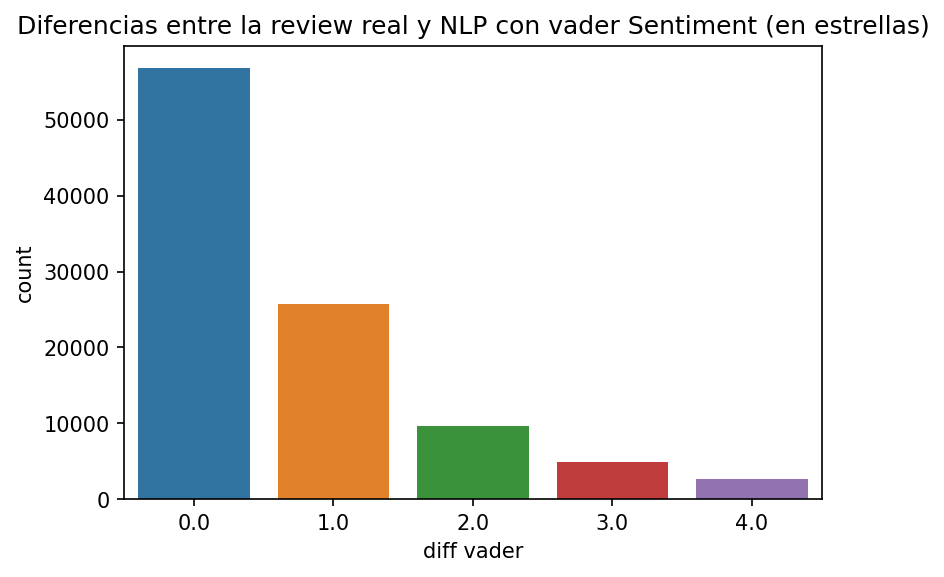

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#Analizamos visualmente las diferencias.
#vaderSentiment
plt.figure(dpi=150)
plt.title("Diferencias entre la review real y NLP con vader Sentiment (en estrellas)")
plt.xlabel("Diferencias (estrellas)")
sns.countplot(x = df["diff vader"])

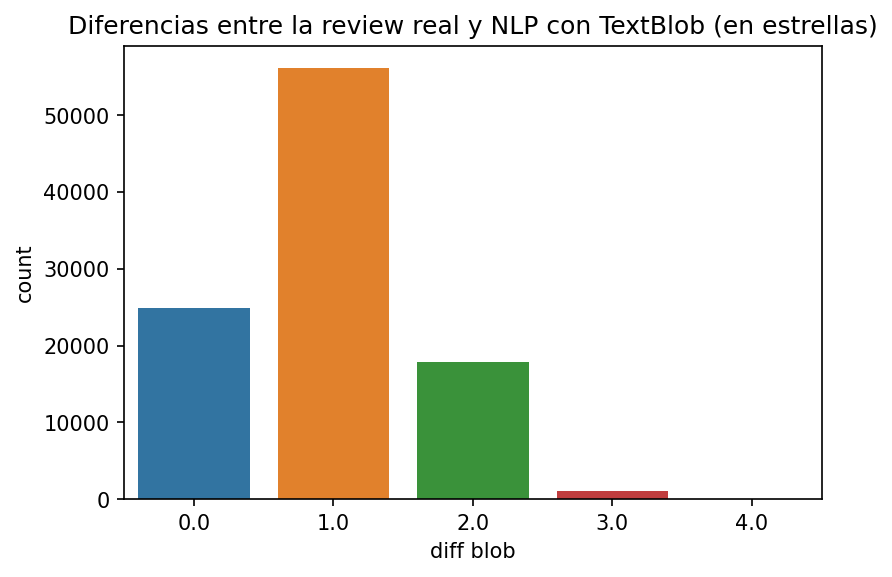

In [9]:
#Text Blob
plt.figure(dpi=150)
plt.title("Diferencias entre la review real y NLP con TextBlob (en estrellas)")
plt.xlabel("Diferencias (estrellas)")
sns.countplot(x = df["diff blob"])

Visualmente se puede ver como Vader Sentiment funciona mejor que TextBlob.

**Busco correlación:**

Ambos tienen correlacion positiva (esperable porque a más alto indicador, mejor la review. Es decir, se esperarían mas estrellas.

Pero, vader compound tiene una correlación positiva un poco más alta que textblob. Se condice con lo que visualmente podiamos ver antes.


In [10]:
df_corr = df[["stars", "vader compound", "blob polaridad"]]
df_corr.corr()

,stars,vader compound,blob polaridad
stars,1.000000,0.673738,0.641873
vader compound,0.673738,1.000000,0.620268
blob polaridad,0.641873,0.620268,1.000000
